In [1]:
#import necessary packages
import numpy as np
import pandas as pd

train_in_file = 'C:/Users/ZhangLockerberg/Downloads/Kaggle/train.csv'
test_in_file = 'C:/Users/ZhangLockerberg/Downloads/Kaggle/test.csv'
data = pd.read_csv(train_in_file)
test = pd.read_csv(test_in_file)

In [2]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
#check data shape
data.shape

(8693, 14)

In [5]:
#fill missing CryoSleep data with True for those not spending any money
#fill missing spenditure data of kids under 13 with zero spending
data['TotalSpended'] = data['RoomService'] + data['FoodCourt'] + data['ShoppingMall'] + data['Spa'] + data['VRDeck']
test['TotalSpended'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']
data.loc[(data['CryoSleep'].isnull()) 
         & (data['TotalSpended'] <= 0), 'CryoSleep'] = True
test.loc[(test['CryoSleep'].isnull()) 
         & (test['TotalSpended'] <= 0), 'CryoSleep'] = True

data.loc[(data['FoodCourt' or 'RoomService'
            or 'ShoppingMall' or 'Spa' or 'VRDeck'].isnull()) 
         & (data['Age'] <= 13.5), ['FoodCourt','RoomService'
            , 'ShoppingMall', 'Spa','VRDeck']] = 0
test.loc[(test['FoodCourt' or 'RoomService'
            or 'ShoppingMall' or 'Spa' or 'VRDeck'].isnull()) 
         & (test['Age'] <= 13.5), ['FoodCourt','RoomService'
            , 'ShoppingMall', 'Spa','VRDeck']] = 0

In [6]:
#fill nan with median numbers
data = data.fillna(data.median(axis=0))
test = test.fillna(test.median(axis=0))

In [7]:
#check decretized candidate data
print(data.HomePlanet.unique(),
      data.Cabin.unique(),
      data.Destination.unique(), sep='\n')

['Europa' 'Earth' 'Mars' nan]
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


In [8]:
#looking for an appropriate option for missing values
from IPython.display import display
display(data.groupby('HomePlanet').count())
display(data.groupby('Destination').count())

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended
HomePlanet,,,,,,,,,,,,,,
Earth,4602,4602,4507,4503,4602,4602,4602,4602,4602,4602,4602,4496,4602,4602
Europa,2131,2131,2070,2094,2131,2131,2131,2131,2131,2131,2131,2085,2131,2131
Mars,1759,1759,1722,1717,1759,1759,1759,1759,1759,1759,1759,1718,1759,1759


,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended
Destination,,,,,,,,,,,,,,
55 Cancri e,1800,1769,1800,1750,1800,1800,1800,1800,1800,1800,1800,1757,1800,1800
PSO J318.5-22,796,780,796,778,796,796,796,796,796,796,796,779,796,796
TRAPPIST-1e,5915,5765,5915,5788,5915,5915,5915,5915,5915,5915,5915,5779,5915,5915


In [9]:
#fill nans with mode
data.HomePlanet.fillna('Earth', inplace=True)
data.Destination.fillna('TRAPPIST-1e', inplace=True)

test.HomePlanet.fillna('Earth', inplace=True)
test.Destination.fillna('TRAPPIST-1e', inplace=True)

In [10]:
#check result
print(data.HomePlanet.unique(),
      data.Cabin.unique(),
      data.Destination.unique(), sep='\n')

['Europa' 'Earth' 'Mars']
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']


In [11]:
#zoom in to see cabin
len(data.Cabin.unique()), len(data.Cabin.unique()) == len(data)

(6561, False)

In [12]:
#split cabin into multiple columns
data[['A','B','C']] = data.Cabin.str.split('/', -1, expand=True)
test[['A','B','C']] = test.Cabin.str.split('/', -1, expand=True)

In [13]:
#check mode
display(data.groupby('A').count())
display(data.groupby('B').count())
display(data.groupby('C').count())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended,B,C
A,,,,,,,,,,,,,,,,,
A,256,256,256,256,256,256,256,256,256,256,256,256,249,256,256,256,256
B,779,779,779,779,779,779,779,779,779,779,779,779,763,779,779,779,779
C,747,747,747,747,747,747,747,747,747,747,747,747,733,747,747,747,747
D,478,478,478,478,478,478,478,478,478,478,478,478,468,478,478,478,478
E,876,876,876,876,876,876,876,876,876,876,876,876,857,876,876,876,876
F,2794,2794,2794,2794,2794,2794,2794,2794,2794,2794,2794,2794,2721,2794,2794,2794,2794
G,2559,2559,2559,2559,2559,2559,2559,2559,2559,2559,2559,2559,2501,2559,2559,2559,2559
T,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended,A,C
B,,,,,,,,,,,,,,,,,
0,18,18,18,18,18,18,18,18,18,18,18,18,17,18,18,18,18
1,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
10,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
100,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
1000,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
1001,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1002,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
1003,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1004,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended,A,B
C,,,,,,,,,,,,,,,,,
P,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4112,4206,4206,4206,4206
S,4288,4288,4288,4288,4288,4288,4288,4288,4288,4288,4288,4288,4184,4288,4288,4288,4288


In [14]:
#fill nan with mode
data.A.fillna('F', inplace=True)
data.B.fillna(0, inplace=True)
data.C.fillna('S', inplace=True)

test.A.fillna('F', inplace=True)
test.B.fillna(0, inplace=True)
test.C.fillna('S', inplace=True)

In [15]:
#check results
print(data.A.unique(), data.B.unique(), data.C.unique())

['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T'] ['0' '1' '2' ... '1892' '1893' '1894'] ['P' 'S']


In [16]:
#view data
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended,A,B,C
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1,S


In [17]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'TotalSpended', 'A', 'B', 'C'],
      dtype='object')

In [18]:
#get necessary columns
labels = data.Transported
data = data[['HomePlanet', 'CryoSleep', 'Destination', 'Age',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
        'A', 'B', 'C']]

test = test[['HomePlanet', 'CryoSleep', 'Destination', 'Age',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
        'A', 'B', 'C']]

In [19]:
#view data
display(data)

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,A,B,C
0,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,F,1,S
5,Earth,False,PSO J318.5-22,44.0,0.0,483.0,0.0,291.0,0.0,F,0,P
6,Earth,False,TRAPPIST-1e,26.0,42.0,1539.0,3.0,0.0,0.0,F,2,S
7,Earth,True,TRAPPIST-1e,28.0,0.0,0.0,0.0,0.0,0.0,G,0,S
8,Earth,False,TRAPPIST-1e,35.0,0.0,785.0,17.0,216.0,0.0,F,3,S
9,Europa,True,55 Cancri e,14.0,0.0,0.0,0.0,0.0,0.0,B,1,P


In [20]:
len(data.A.unique())

8

In [21]:
data.B = data.B.astype('int')
test.B = test.B.astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
HomePlanet      8693 non-null object
CryoSleep       8693 non-null object
Destination     8693 non-null object
Age             8693 non-null float64
RoomService     8693 non-null float64
FoodCourt       8693 non-null float64
ShoppingMall    8693 non-null float64
Spa             8693 non-null float64
VRDeck          8693 non-null float64
A               8693 non-null object
B               8693 non-null int32
C               8693 non-null object
dtypes: float64(6), int32(1), object(5)
memory usage: 781.1+ KB


In [22]:
data = pd.get_dummies(data)
test = pd.get_dummies(test)

In [23]:
data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,B,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,A_A,A_B,A_C,A_D,A_E,A_F,A_G,A_T,C_P,C_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
5,44.0,0.0,483.0,0.0,291.0,0.0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
6,26.0,42.0,1539.0,3.0,0.0,0.0,2,1,0,0,...,0,0,0,0,0,1,0,0,0,1
7,28.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
8,35.0,0.0,785.0,17.0,216.0,0.0,3,1,0,0,...,0,0,0,0,0,1,0,0,0,1
9,14.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [24]:
#ready for preprocessing
data = data.astype('int')
test = test.astype('int')

In [25]:
#start preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X = scaler.fit_transform(data)
test = scaler.fit_transform(test)

In [26]:
X_train, y_train, X_test, y_test = train_test_split(X, labels, test_size = 0.25, shuffle=True)

It seems to be a binary classified structure, vaguely separated by the the middle blue line.

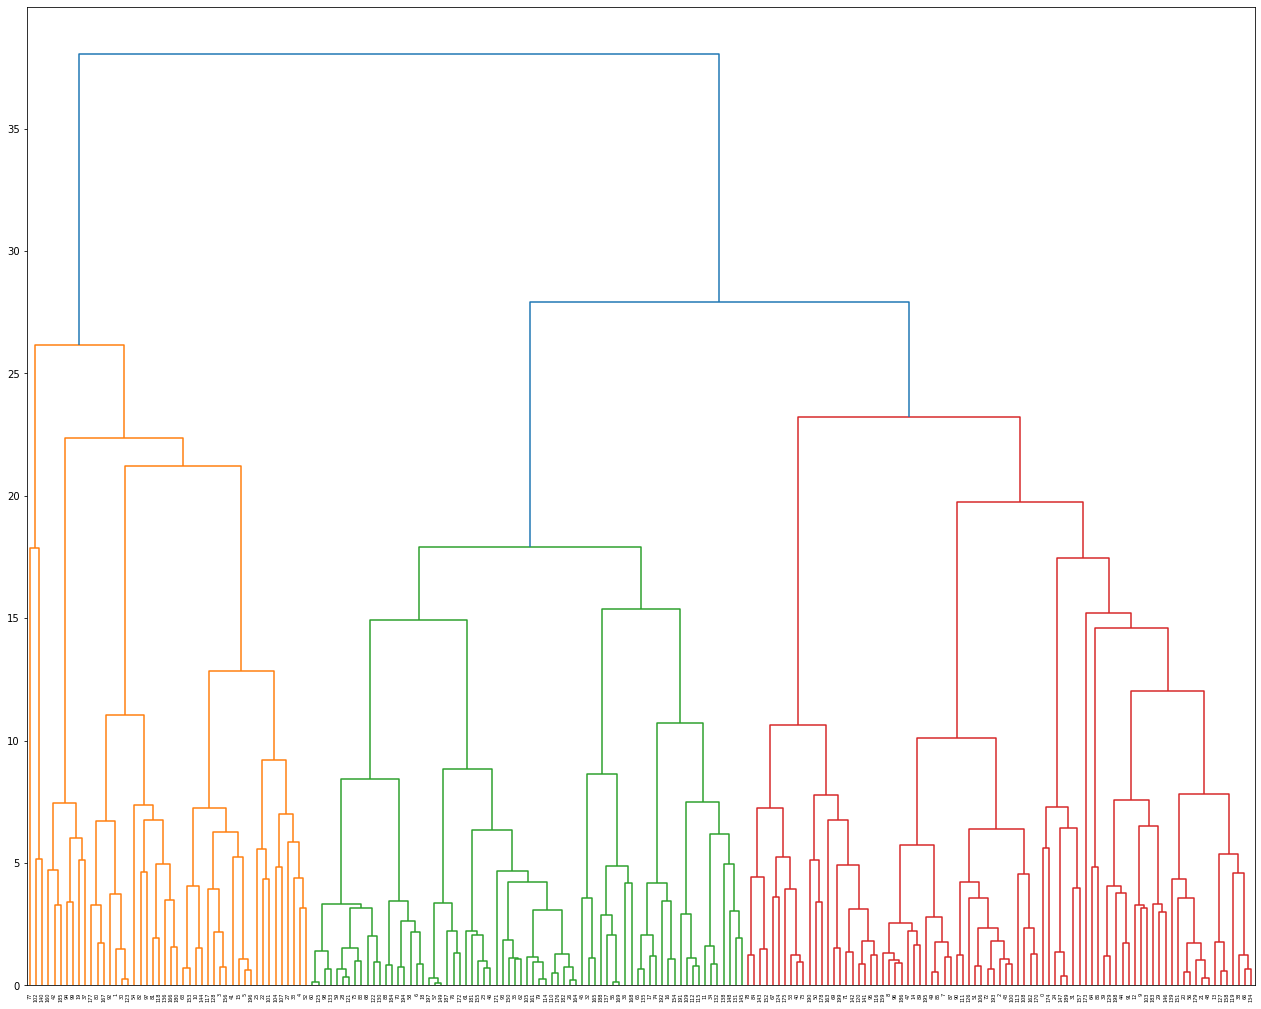

In [27]:
#using hierachical clustering to understand data
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 18))
linkage_type = 'ward'
linkage_matrix = linkage(X_train[:200, :], linkage_type)
dendrogram(linkage_matrix)
plt.show()

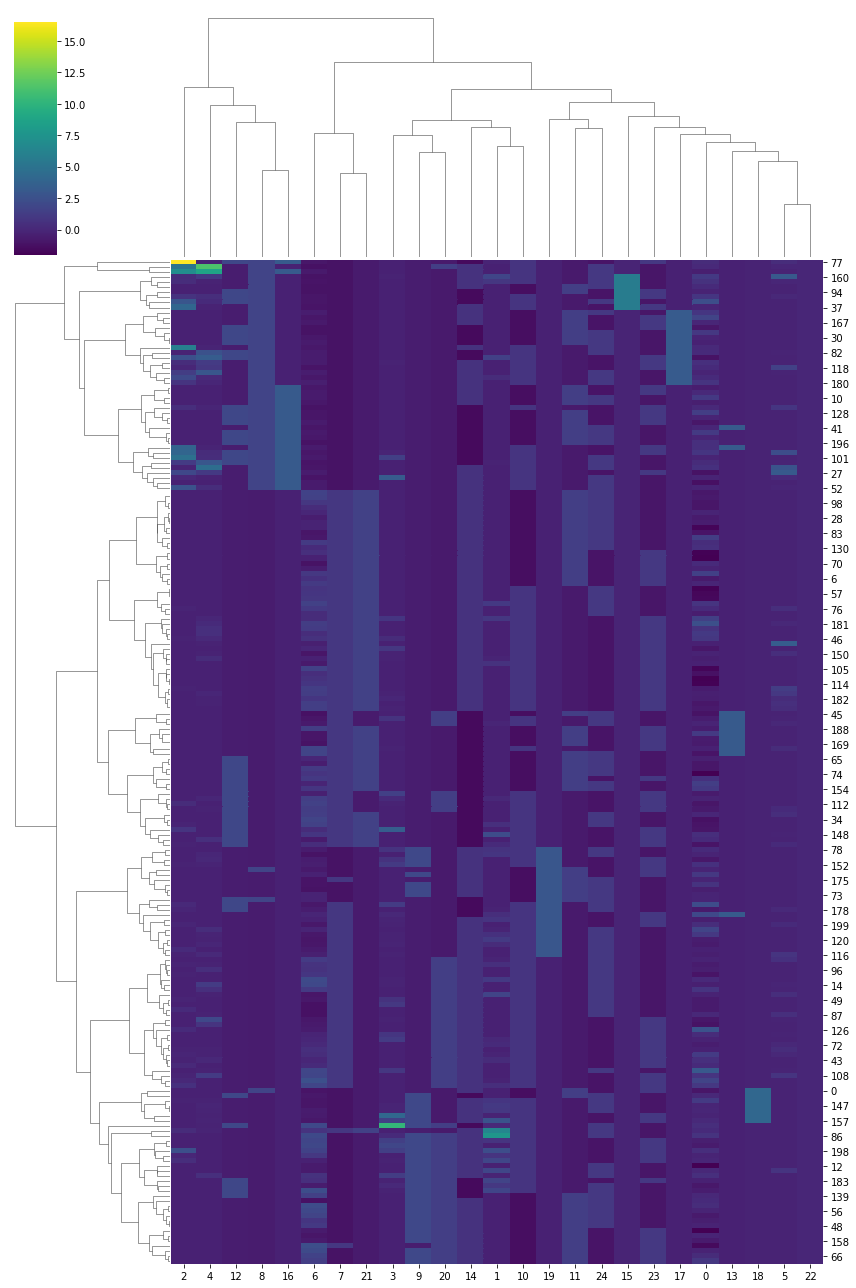

In [28]:
#using seaborn to see clearer
import seaborn as sns

sns.clustermap(X_train[:200, :], figsize=(12, 18), method=linkage_type, cmap='viridis')
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

complete = AgglomerativeClustering(n_clusters=200, linkage='complete')
complete_pred = complete.fit_predict(X_train)

average = AgglomerativeClustering(n_clusters=200, linkage='average')
average_pred = average.fit_predict(X_train)

ward = AgglomerativeClustering(n_clusters=200)
ward_pred = ward.fit_predict(X_train)

complete_score = adjusted_rand_score(X_test.astype('int'), complete_pred)
average_score = adjusted_rand_score(X_test.astype('int'), average_pred)
ward_score = adjusted_rand_score(X_test.astype('int'), ward_pred)

print('Scores: \nWard:', ward_score, '\nAverage:', average_score, '\nComplete:', complete_score)

Scores: 
Ward: 0.006087777557605065 
Average: 0.024959245343987413 
Complete: 0.013554096060969634


Text(0.5, 1.0, 'Scree Plot')

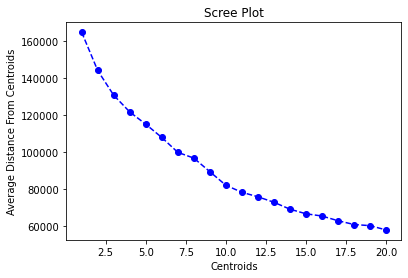

In [30]:
from sklearn.cluster import KMeans

def k_fit(k):
    scores = []
    for _ in range(1, k+1):
        kmeans_k = KMeans(_)
        kmeans_k.fit(X_train)
        scores.append(abs(kmeans_k.score(X_train)))
    return scores

k=20
scores = k_fit(k)
plt.plot(range(1,k+1), scores, '--', marker='o', color='b')
plt.xlabel('Centroids')
plt.ylabel('Average Distance From Centroids')
plt.title('Scree Plot')

In [31]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def train(models, X_train, X_test, n_estimators=None, min_samples_leaf=None):
    model_selection = []
    for model in models:
        if model != AdaBoostClassifier and model != DecisionTreeClassifier:
            model = model(n_estimators=200, min_samples_leaf=3)
            model.fit(X_train, X_test)
            prediction = model.predict(y_train)
            score = accuracy_score(prediction, y_test)
            print(model, score)
        elif model != DecisionTreeClassifier:
            rf = DecisionTreeClassifier(min_samples_leaf=3, max_depth=25)
            ada = model(base_estimator=rf, n_estimators=200)
            ada.fit(X_train, X_test)
            prediction = ada.predict(y_train)
            score = accuracy_score(prediction, y_test)
            print(model, score)
        else:
            tree = DecisionTreeClassifier(min_samples_leaf=3, max_depth=200)
            tree.fit(X_train, X_test)
            prediction = tree.predict(y_train)
            score = accuracy_score(prediction, y_test)
            print(model, score)
        model_selection.append(model)
    return model_selection
            
results = train([RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, DecisionTreeClassifier],
      X_train,
      X_test)

RandomForestClassifier(min_samples_leaf=3, n_estimators=200) 0.8026678932842686
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 0.7759889604415824
GradientBoostingClassifier(min_samples_leaf=3, n_estimators=200) 0.8008279668813247
<class 'sklearn.tree._classes.DecisionTreeClassifier'> 0.7529898804047838


In [32]:
#We could try adding clustered labels into data to see if that helps improvement
ward = AgglomerativeClustering(n_clusters=2)
X_ward_pred = ward.fit_predict(X_train)
X_ward_pred = scaler.fit_transform(X_ward_pred.reshape(-1,1))
X_added = np.hstack((X_train, ward_pred.reshape(-1,1)))


y_ward_pred = ward.fit_predict(y_train)
y_ward_pred = scaler.fit_transform(y_ward_pred.reshape(-1,1))
y_added = np.hstack((y_train, y_ward_pred.reshape(-1,1)))


t_added = ward.fit_predict(test)
t_added = scaler.fit_transform(t_added.reshape(-1,1))
t_added = np.hstack((test, t_added.reshape(-1,1)))


def train2(models, X_train, X_test, n_estimators=None, min_samples_leaf=None):
    model_selection = []
    for model in models:
        if model != AdaBoostClassifier and model != DecisionTreeClassifier:
            model = model(n_estimators=200, min_samples_leaf=3, min_samples_split=2)
            model.fit(X_train, X_test)
            prediction = model.predict(y_added)
            score = accuracy_score(prediction, y_test)
            print(model, score)
        elif model != DecisionTreeClassifier:
            rf = DecisionTreeClassifier(min_samples_leaf=3, max_depth=25)
            ada = model(base_estimator=rf, n_estimators=200)
            ada.fit(X_train, X_test)
            prediction = ada.predict(y_added)
            score = accuracy_score(prediction, y_test)
            print(model, score)
        else:
            tree = DecisionTreeClassifier(min_samples_leaf=3, max_depth=200)
            tree.fit(X_train, X_test)
            prediction = tree.predict(y_added)
            score = accuracy_score(prediction, y_test)
            print(model, score)
        model_selection.append(model)
    return model_selection
results2 = train2([RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, DecisionTreeClassifier],
      X_added,
      X_test)

RandomForestClassifier(min_samples_leaf=3, n_estimators=200) 0.7953081876724931
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 0.7539098436062558
GradientBoostingClassifier(min_samples_leaf=3, n_estimators=200) 0.796688132474701
<class 'sklearn.tree._classes.DecisionTreeClassifier'> 0.6605335786568537


looks clustered labels are more effective

In [33]:
#Use grid search to find best parameters
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
parameters = {'n_estimators':[100, 150, 200],
              'min_samples_leaf': [3, 5, 7, 9]}

scorer = make_scorer(f1_score)
grid_obj = GridSearchCV(clf, scoring=scorer, param_grid=parameters)
print('done1')
grid_obj.fit(X_train, X_test.astype('int'))
print('done2')
best_clf = grid_obj.best_estimator_
best_clf.fit(X_train, X_test.astype('int'))
print('done3')
prediction = best_clf.predict(y_train)
print(accuracy_score(prediction, y_test.astype('int')), f1_score(prediction, y_test.astype('int')))

done1
done2
done3
0.795768169273229 0.7840466926070038


In [34]:
rf_model = results[0]
np.savetxt('result.txt', rf_model.predict(test), fmt='%s')

In [35]:
np.savetxt('result2.txt', best_clf.predict(test), fmt='%s')

In [36]:
from sklearn.svm import SVC
model = SVC(class_weight='balanced')
model.fit(X_train, X_test)
prediction = model.predict(y_train)
score = accuracy_score(prediction, y_test)
print(model, score, sep='\n')

SVC(class_weight='balanced')
0.8008279668813247


In [37]:
np.savetxt('result3.txt', model.predict(test), fmt='%s')

In [38]:
#Curious about how Xgboost performs
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=800, min_samples_leaf=2, max_depth=50, n_jobs=20)
model.fit(X_train, X_test)
prediction = model.predict(y_train)
score = accuracy_score(prediction, y_test)
print(model, score, sep='\n')

C:\Anaconda3\envs\keras\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:37:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:37:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.30

In [39]:
np.savetxt('result4.txt', model.predict(test), fmt='%s')